
Fast Gradient Algorithm Coefficients:
 [-0.14275339 -0.17335364 -0.11477319 -0.10192977 -0.13243512 -0.15883048
 -0.09806541 -0.14415068 -0.12638874 -0.09971595 -0.20047776 -0.14743671
 -0.17098003 -0.07797145 -0.06824531 -0.18756696 -0.18393755 -0.18393743
 -0.07210599 -0.11044924 -0.08470982 -0.11821951 -0.15741117 -0.12275578
 -0.0679655  -0.09572769 -0.13293242 -0.11845543 -0.11448999 -0.09597758
 -0.12723374 -0.15806872 -0.09639849 -0.12410915 -0.11640844 -0.16153473
 -0.08688411 -0.10681903 -0.11069289 -0.1287847  -0.14436268 -0.1307091
 -0.18996118 -0.13630747 -0.16809994 -0.11727725 -0.14311176 -0.15872864
 -0.16637567 -0.18348407]

Sci-kit Learn's LogisticRegression() Coefficients:
 [[-0.14274808 -0.17335034 -0.11477689 -0.10192978 -0.13242802 -0.15882511
  -0.09807183 -0.14414954 -0.12638705 -0.09970951 -0.20047637 -0.14743709
  -0.17097865 -0.07797474 -0.06824292 -0.18755379 -0.18393915 -0.18393293
  -0.07210647 -0.11044892 -0.08471212 -0.11821681 -0.1574185  -0.12275346
  

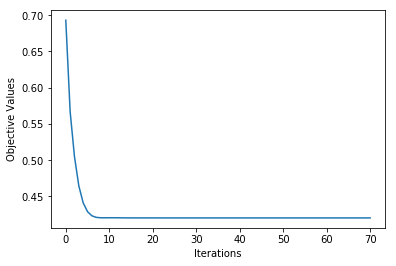

In [1]:
"""
This code shows an example implementing the fast gradient algorithm to compute
the beta coefficients and misclassification error. It compares the beta
coefficients to that of sklearn.
"""


import src.logistic_reg as lreg
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline


# create simulated dataset
np.random.seed(0)

data1 = np.random.random(size=(250, 50)) - 0.05
data2 = np.random.random(size=(300, 50)) + 0.05
data = np.concatenate((data1, data2), axis=0)

label1 = np.ones(shape=(250, ))
label2 = np.ones(shape=(300, ))*-1
label = np.concatenate((label1, label2), axis=0)

# define the split between train and test data
x_train, x_test, y_train, y_test = train_test_split(data,
                                                    label,
                                                    random_state=0)

# standardize the data
x_scaler = StandardScaler().fit(x_train)
x_train = x_scaler.transform(x_train)
x_test = x_scaler.transform(x_test)
n = x_train.shape[0]
d = x_train.shape[1]

# initialize the beta and theta values
beta_init = np.zeros(d)
theta_init = np.zeros(d)

# run the fast gradient algorithm to find the beta coefficients
fastgrad_betas = lreg.fastgradalgo(beta_init=beta_init,
                                   theta_init=theta_init,
                                   lamb=0.1,
                                   x=x_train,
                                   y=y_train,
                                   max_iter=1000)

# run sci-kit learn's LogisticRegression() to find the beta coefficients
logit = LogisticRegression(C=1/(2*n*0.1),
                           fit_intercept=False,
                           tol=1e-8).fit(x_train, y_train)

# print the coefficients found using the fast gradient algorithm and sklearn
print("\nFast Gradient Algorithm Coefficients:\n", fastgrad_betas[-1])
print("\nSci-kit Learn's LogisticRegression() Coefficients:\n", logit.coef_)

# apply the coefficients found using the fast gradient algorithm to test set
y_predict = (np.dot(x_test, fastgrad_betas[-1]) > 0)*2 - 1

# print the misclassification error
print("\nMisclassification Error: %.2f%%" % (np.mean(y_predict != y_test)*100))

# initialize list for all objective values
objective_values = []

# iterate over coefficients and calculate objective values
for i in fastgrad_betas:
    objective_values.append(lreg.computeobj(beta=i, lamb=0.1, x=x_train, y=y_train))

# plot objective values against iterations
plt.plot(range(len(objective_values)), objective_values);
plt.xlabel('Iterations');
plt.ylabel('Objective Values');
